# **ARBOLES DE DECISIÓN CLASIFICADORES Y REGRESORES**
---


## **Indice :**

### 1.   Árbol Clasificador **CON** lógica inicial
### 2.   Árbol Clasificador **SIN** lógica inicial
### 3.   Árbol Clasificador **DATA SET REAL - TITANIC**
### 4.   Árbol Regresor






# **1. Árbol Clasificador "CON" lógica inicial**

---

En este primer chunk de código se construye un **dataset que hemos creado nosotros**, simula la concesión de un préstamo bancario.  

Generamos un **numero de datos aleatorio (n)** pero usamos unas **reglas** para determinar como debe comportarse la variable **objetivo**

#### **1. Creación de variables explicativas**
Se generan 200 observaciones con tres características:
- **Ingresos_k**: ingresos anuales en miles de euros.
- **Tasa_pago_atiempo**: indicador del buen comportamiento de pago.
- **Edad**: edad del solicitante.

Estas variables representan criterios típicos usados en la evaluación de riesgo crediticio.

#### **2. Definición de la variable objetivo**
La variable **Aprobado = 1** se crea aplicando una lógica jerárquica de **3 niveles** , en caso de prestamo rechazado **Aprobado = 0**

1. Ingresos > 35k → préstamo rechazado.
2. Pagos < 50% → préstamo rechazado.
3. Edad < 25 → préstamo rechazado.
4. Si cumple todo lo anterior → préstamo aprobado.

De esta forma, el resultado de nuestro arbol **no es aleatorio**, sino consecuencia directa de reglas que hemos establecido

#### **3. Objetivo del enfoque**
Este diseño permite comprobar que el **algoritmo de árbol de decisión aprende correctamente la estructura lógica establecida previamente**.  

Más adelante, entrenaremos un árbol sin imponer reglas explícitas para que **descubra por sí mismo los patrones** presentes en los datos y se compare su comportamiento.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

from sklearn import tree


# Generamos 200 filas de datos aleatorios
np.random.seed(42)
n = 200 # Ajustalo al numero de datos que te sientas comodo

datos = {
    'Ingresos_k': np.random.randint(10, 100, n),   # De 10k a 100k
    'Tasa_pago_atiempo': np.random.randint(1, 100, n), # Score de 1% a 100%
    'Edad': np.random.randint(18, 70, n)            # De 18 a 70 años
}

df = pd.DataFrame(datos)

# Aplicamos una lógica de 3 niveles para crear la columna 'Aprobado'
def decidir_prestamo(row):
    if row['Ingresos_k'] < 35:
        return 0 # Nivel 1: Ingresos bajos -> No
    elif row['Tasa_pago_atiempo'] < 50:
        return 0 # Nivel 2: Mal pagador -> No
    elif row['Edad'] < 25:
        return 0 # Nivel 3: Demasiado joven -> No
    else:
        return 1 # Prestamo Aprobado

df['Aprobado'] = df.apply(decidir_prestamo, axis=1)

print(f"Dataset creado con {len(df)} filas.")
print(df.head(10)) # Por si quieres mirar las primeras 10 filas

Dataset creado con 400 filas.
   Ingresos_k  Tasa_pago_atiempo  Edad  Aprobado
0          61                 52    65         1
1          24                 42    64         0
2          81                 70    40         1
3          70                 15    32         0
4          30                 54    54         0
5          92                 60    38         1
6          96                 97    31         1
7          84                  8    19         0
8          84                 53    28         1
9          97                 60    68         1


## **1.1 Entrenamiento del Árbol de Decisión**

---

En este chunk se prepara el problema de **aprendizaje supervisado** y se entrena el árbol.

- **X** contiene las variables explicativas (*Ingresos_k*, *Tasa_pago_atiempo* y *Edad*).
- **y** es la variable objetivo (**Aprobado**).

Se entrena un **DecisionTreeClassifier** con:
- **criterion='gini'**, para elegir las mejores divisiones.
- **max_depth=3**, para forzar al árbol a aprender los **3 niveles de decisión** definidos en la lógica original.

De esta forma, el modelo aprende automáticamente las reglas que determinan si un préstamo se aprueba o no.


In [ ]:
# Definimos X (pistas) e y (objetivo)
X = df[['Ingresos_k', 'Tasa_pago_atiempo', 'Edad']]
y = df['Aprobado']

# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el árbol. max_depth=3 nos asegura ver los 3 niveles de preguntas
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(X_train, y_train)

## **1.2 Interpretación del Árbol de Decisión**

---


Un árbol de decisión aprende reglas del tipo **if / else** a partir de los datos. En cada nodo aparece una **condición** (por ejemplo `Tasa_pago_atiempo <= 49.5`) que decide qué rama seguir.

* **samples** indica cuántas observaciones llegan a ese nodo.  
* **value** muestra cuántas pertenecen a cada clase, por ejemplo `[138, 62]` (Denegado, Aprobado).  
* **class** es la clase final asignada, siempre la mayoritaria.  
* **gini** mide la impureza: `0` significa decisión perfecta y valores altos indican mezcla de clases.

Los nodos hoja representan la **decisión final**. El árbol intenta reducir el gini en cada división y, así, reconstruir automáticamente la lógica usada para generar los datos.


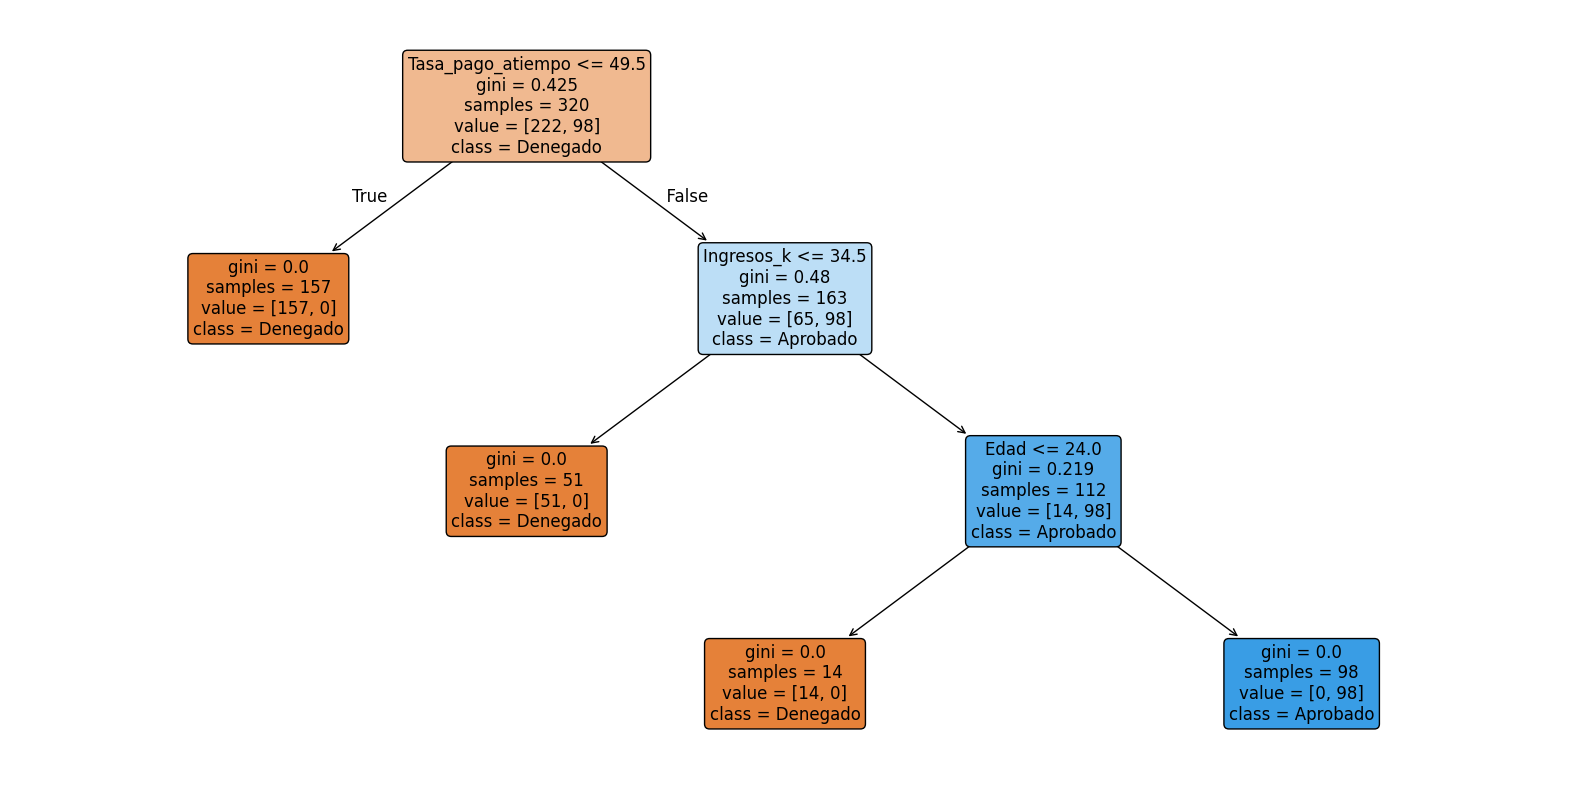

Rendimiento del Entrenamiento: 100.00%


In [120]:
# Dibujamos el árbol resultante (CORTESÍA CHAT GPT)
plt.figure(figsize=(20,10))
plot_tree(clf,
          feature_names=['Ingresos_k', 'Tasa_pago_atiempo', 'Edad'],
          class_names=['Denegado', 'Aprobado'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()

# Hacemos que el modelo intente predecir los datos del grupo Train
y_pred_train = clf.predict(X_train)

# Comparamos las predicciones con la realidad (y_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Hacemos un print del rendimiento (Quedará debajo del grafico del arbol)
print(f"Rendimiento del Entrenamiento: {accuracy_train * 100:.2f}%")

## **1.3 Test del modelo entrenado**

---


Este paso pone a prueba al arbol con datos nuevos que no utilizo para aprender.

**Ejecucion de la prediccion**
En la linea y_pred = clf.predict(X_test), el modelo toma las filas de X_test y las pasa por sus reglas de decision (if/else) hasta asignarles una etiqueta final

**Calculo del exito**
Al comparar **y_pred **con las **respuestas reales y_test**, obtenemos el Accuracy o porcentaje de acierto. Esto **permite verificar si el arbol generaliza bien o si ha caido en el sobreajuste**, que es cuando el modelo se aprende los datos de memoria pero falla con informacion nueva

**Si el rendimiento en el test es muy inferior al de entrenamiento, el arbol esta sobreajustado** y se deben aplicar criterios de parada como reducir la profundidad maxima

In [121]:
# Hacemos que el modelo intente predecir los datos del grupo Test
y_pred = clf.predict(X_test)

# Comparamos las predicciones con la realidad (y_test)
accuracy = accuracy_score(y_test, y_pred)

# Hacemos un print del rendimiento
print(f"Rendimiento del test (Accuracy): {accuracy * 100:.2f}%")

Rendimiento del test (Accuracy): 100.00%


# **2. Árbol Clasificador "SIN" lógica inicial**

---

En el primer caso hemos visto que un árbol de decisión puede determinar si una persona es **apta o no para un préstamo**

Ahora eliminamos cualquier regla impuesta manualmente y dejamos que el **árbol aprenda por sí solo a partir de los datos**.

El objetivo es observar qué variables considera más importantes y qué combinaciones de ingresos, edad o comportamiento de pago utiliza para tomar decisiones.

Este enfoque es más realista, ya que en la práctica los bancos no siempre definen reglas fijas, sino que **aprenden patrones a partir del historial de clientes**.

Más adelante daremos un paso más útil para el negocio: en lugar de clasificar clientes como *aprobados o no*, utilizaremos un **DecisionTreeRegressor** para **predecir la probabilidad de impago**, lo que permite cuantificar el riesgo de cada cliente y tomar decisiones más precisas.



In [122]:
# Generamos n filas de datos aleatorios (Modificable en el primer chunk)
np.random.seed(42)
datos_aleatorios = {
    'Ingresos_k': np.random.randint(10, 100, n),   # De 10k a 100k
    'Tasa_pago_atiempo': np.random.randint(1, 100, n), # Score de 1% a 100%
    'Edad': np.random.randint(18, 70, n),         # De 18 a 70 años
    'Aprobado' : np.random.randint(0, 2, n)       # 0 = Denegado, 1 = Aprobado
}

df_aleatorio = pd.DataFrame(datos_aleatorios)

print(f"Dataset creado con {len(df)} filas.")
# print(df.head(10)) # Por si quieres mirar las primeras 10 filas

Dataset creado con 400 filas.


## **2.1 Entrenamiento del Árbol de Decisión**

---

El proceso es el mismo que en el entrenamiento del arbol anterioR



In [ ]:
# Definimos X (pistas) e y (objetivo)
X_aleatorio = df_aleatorio[['Ingresos_k', 'Tasa_pago_atiempo', 'Edad']]
y_aleatorio = df_aleatorio['Aprobado']

# Dividimos los datos en train y test
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_aleatorio, y_aleatorio, test_size=0.2, random_state=42)

# Entrenamos el árbol. max_depth=3 nos asegura ver los 3 niveles de preguntas
clf_aleatorio = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_aleatorio.fit(X_train_a, y_train_a)

## **2.2 Interpretación del Árbol de Decisión SIN reglas previas**

---

En este árbol ya no existen reglas predefinidas: el modelo ha **descubierto por sí mismo los patrones** presentes en los datos. Las divisiones no siguen una lógica de negocio clara, sino que se eligen únicamente para **reducir la impureza (gini)** en cada nodo.

El valor **gini** indica cómo de mezcladas están las clases:
- Valores cercanos a **0** representan decisiones claras.
- Valores cercanos a **0.5** indican alta incertidumbre.
En este árbol se observan muchos nodos con gini elevado, lo que refleja que los datos no contienen separaciones limpias entre aprobados y denegados.

El uso de **max_depth = 4** limita la complejidad del modelo y evita que el árbol se ajuste demasiado a los datos. Si se aumentara la profundidad, el árbol podría seguir dividiendo hasta obtener nodos con gini cercano a cero, pero a costa de **sobreajustarny perder capacidad de generalización.**

En resumen, este árbol no replica reglas conocidas, sino que actúa como una **herramienta exploratoria**, mostrando qué variables y umbrales el modelo considera más relevantes cuando no existe una estructura clara en los datos.


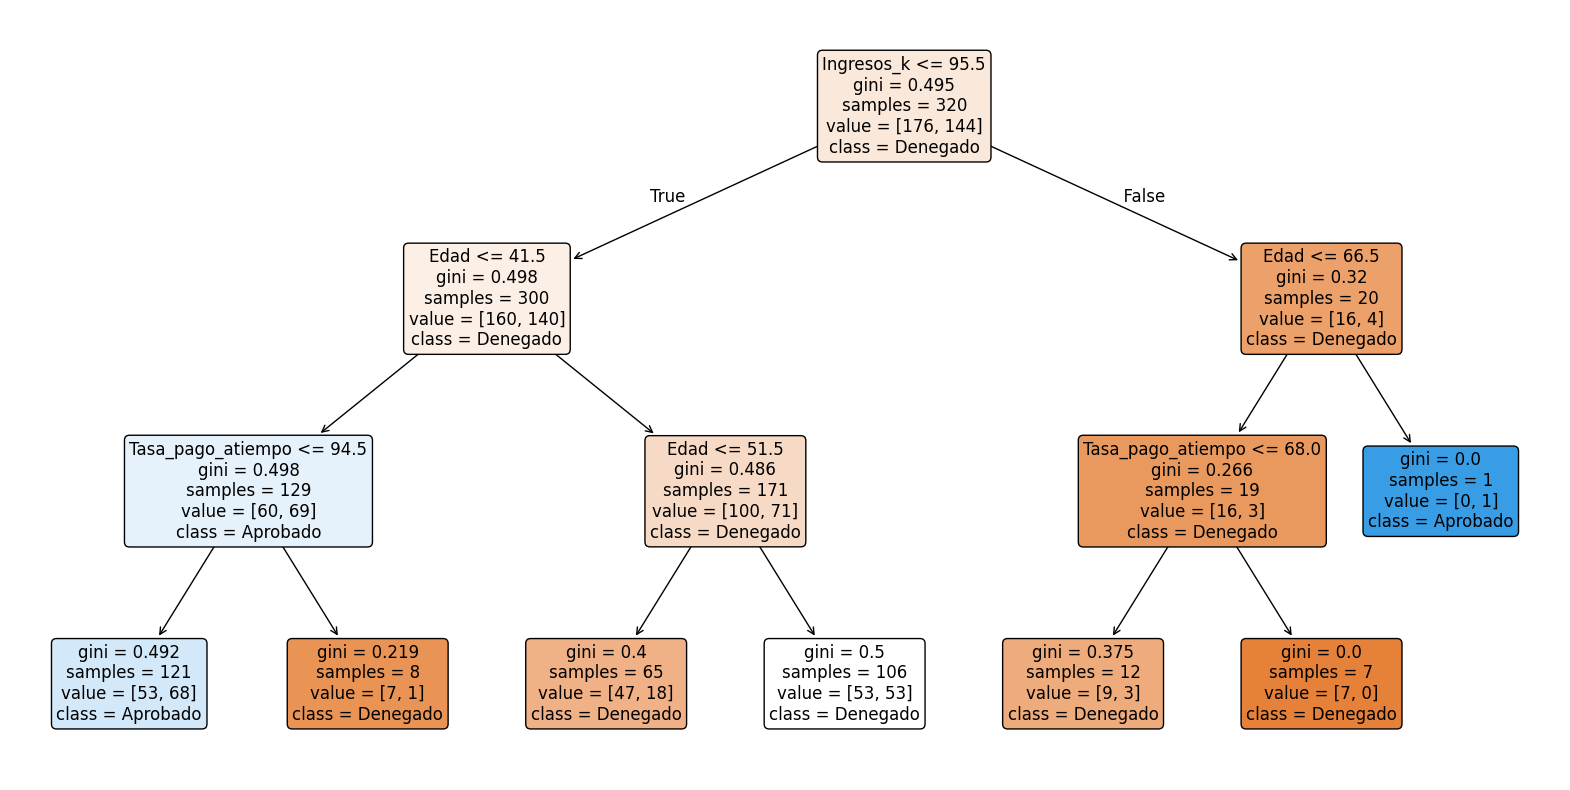

Rendimiento del Entrenamiento: 51.88%


In [124]:
# Dibujamos el árbol resultante (CORTESÍA CHAT GPT)
plt.figure(figsize=(20,10))
plot_tree(clf_aleatorio,
          feature_names=['Ingresos_k', 'Tasa_pago_atiempo', 'Edad'],
          class_names=['Denegado', 'Aprobado'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()


# Hacemos que el modelo intente predecir los datos del grupo Train
y_pred_train_a = clf.predict(X_train_a)

# Comparamos las predicciones con la realidad (y_test)
accuracy_train_a = accuracy_score(y_train_a, y_pred_train_a)

# Hacemos un print del rendimiento (Quedará debajo del grafico del arbol)
print(f"Rendimiento del Entrenamiento: {accuracy_train_a * 100:.2f}%")

# Es normal que me de un rendimiento muy bajo, porque los numeros se hab colocado completamente al azar

## **2.3 Test del modelo entrenado**

---

Se procede igual que en el arbol anterior.

El accuracy es normal que de mas bajo porque los datos se han generado de manera completamente arbitraria.

De hecho el accuracy es bastante malo, y por lo tanto el modelo generaliza mal porque siendo un problema de clasificación binaria, se tiene un 50% de probabilidades de ponerla bien o mal con lo cual **si el accuracy está por debajo del 50% es bastante malo el modelo**

De nuevo, como los datos son completamente aleatorios y no existe ningun tipo de patron, es muy **dificil que el arbol generalice algo.**

Es un ejemplo para mostrar como funcionan los arboles
**texto en negrita**

In [125]:
# Hacemos que el modelo intente predecir los datos del grupo Test
y_pred_a = clf.predict(X_test_a)

# Comparamos las predicciones con la realidad (y_test)
accuracy_a = accuracy_score(y_test_a, y_pred_a)

# Hacemos un print del rendimiento
print(f"Rendimiento del test (Accuracy): {accuracy_a * 100:.2f}%")

Rendimiento del test (Accuracy): 46.25%


# **3. Árbol Clasificador DATA SET REAL - TITANIC**
---

En esta fase inicial preparamos la informacion para que el modelo pueda entenderla.

Los arboles de decision no requieren mucho preprocesado, pero es necesario realizar algunos ajustes basicos:

* **Carga de datos:** Obtenemos el dataset con la informacion de los pasajeros.
* **Conversion de datos:** Transformamos la variable de sexo a formato numerico, asignando **0 para hombres y 1 para mujeres**.
* **Limpieza y seleccion:** Elegimos las variables mas importantes como la clase del pasajero, edad y precio del billete, eliminando las filas que contienen datos vacios para no confundir al algoritmo.

In [126]:
# Carga de datos
df_t = sns.load_dataset('titanic')

# Preprocesado
# Convertimos el sexo a numeros: hombre = 0, mujer = 1
df_t['sex'] = df_t['sex'].map({'male': 0, 'female': 1})

# Seleccionamos las columnas que aportan informacion util y quitamos filas con datos vacios
# Incluimos pclass (clase), sex (sexo), age (edad), fare (precio), sibsp (hermanos) y parch (padres/hijos)
columnas_seleccionadas_t = ['survived', 'pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']
df_t = df_t[columnas_seleccionadas_t].dropna()

## **3.1 Entrenamiento del Árbol de Decisión**

---

En este bloque dividimos la informacion y entrenamos el algoritmo de clasificacion.

* **Division del dataset:** Separamos los datos en un grupo de entrenamiento para que el modelo aprenda y un grupo de test para examinarlo despues. Se utiliza un 80 por ciento para aprender y un 20 por ciento para evaluar.
* **Entrenamiento:** El algoritmo analiza los datos de entrenamiento para encontrar las variables que mejor separan a los pasajeros que vivieron de los que murieron, utilizando el indice de Gini para medir la pureza de los grupos.
* **Control de profundidad:** Limitamos el arbol a 3 niveles de profundidad para evitar el sobreajuste, que es cuando el modelo se aprende los datos de memoria y pierde capacidad de generalizar.

In [ ]:
# Separacion de variables predictoras (X_t) y objetivo (y_t)
X_t = df_t.drop('survived', axis=1)
y_t = df_t['survived']

# Division del dataset en entrenamiento (80%) y test (20%)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

# Creacion y entrenamiento del arbol de clasificacion
# Limitamos la profundidad a 3 para evitar el sobreajuste
clf_t = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_t.fit(X_train_t, y_train_t)

## **3.2 Interpretación del Árbol de Decisión**

---

Este chunk de codigo nos permite **ver el mapa de decisiones que ha creado el algoritmo** y medir que tan bien ha aprendido.

* **Visualizacion:** El diagrama muestra las preguntas de tipo si o no que hace el arbol. Los cuadros con color indican grupos mas puros, donde la mayoria de los pasajeros comparten el mismo destino.
* **Rendimiento de entrenamiento:** Calculamos el porcentaje de acierto sobre los mismos datos que el modelo ya conoce.Esto nos dice que tan bien ha captado el arbol la logica del dataset original.

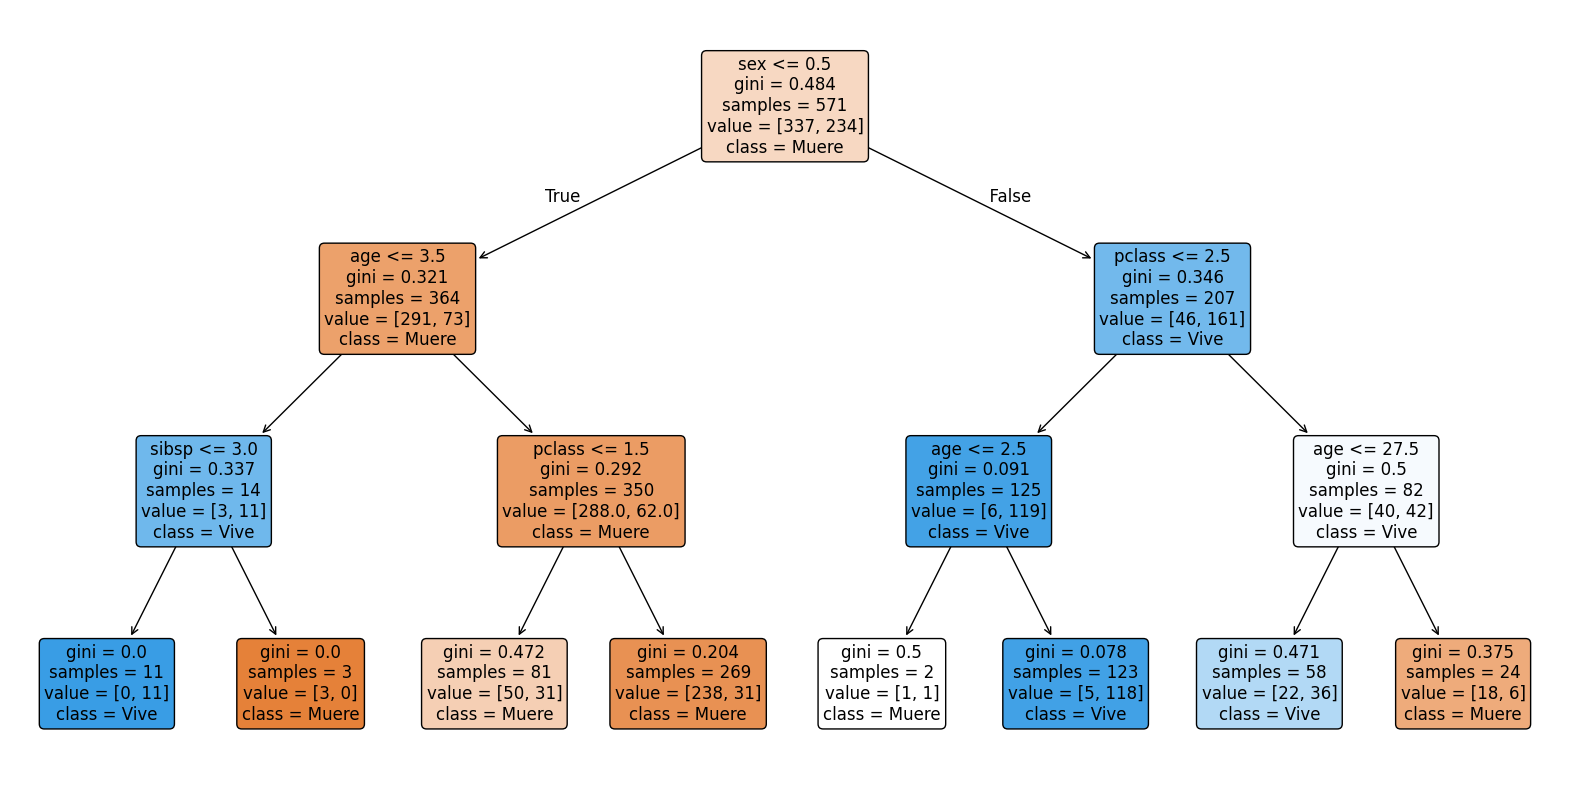

Rendimiento del entrenamiento: 83.19%


In [128]:
plt.figure(figsize=(20,10))
plot_tree(clf_t,
          feature_names=list(X_t.columns),
          class_names=['Muere', 'Vive'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()

# Calculo del rendimiento (Accuracy)
# Prediccion sobre los datos que ya conoce (entrenamiento)
y_pred_train_t = clf_t.predict(X_train_t)
acc_train_t = accuracy_score(y_train_t, y_pred_train_t)

print(f"Rendimiento del entrenamiento: {acc_train_t * 100:.2f}%")

## **3.3 Test del modelo entrenado**

---

Esta es la parte mas importante para validar el modelo, ya que probamos su eficacia con datos que nunca ha visto.

* **Prediccion de test:** El modelo toma los datos reservados en el grupo de test y les aplica las reglas aprendidas para predecir si el pasajero vive o muere.
* **Accuracy del test:** Al comparar estas predicciones con la realidad, obtenemos el rendimiento real del modelo. Si este porcentaje es parecido al de entrenamiento, significa que el arbol es estable y sabe predecir correctamente casos nuevos.

In [129]:
# Prediccion sobre los datos nuevos (test)
y_pred_test_t = clf_t.predict(X_test_t)
acc_test_t = accuracy_score(y_test_t, y_pred_test_t)

print(f"Rendimiento del test: {acc_test_t * 100:.2f}%")

Rendimiento del test: 74.13%


# **4. Árbol Regresor**

---

### Diferencia entre Arbol de Clasificacion y de Regresion

Aunque ambos funcionan dividiendo el dataset mediante preguntas, su objetivo final es distinto:

**Arbol de Clasificacion**
* Predice una categoria o clase como por ejemplo Aprobado o Denegado
* El resultado final es la clase mayoritaria de los elementos que llegan a la hoja
* Busca la maxima homogeneidad o pureza en sus grupos
* Utiliza el Indice de Gini o la Ganancia de Informacion para medir que tan buena es una division

**Arbol de Regresion**
* Predice un valor numerico como por ejemplo % Tasa de pago
* El resultado final es la media o promedio de los valores de los elementos en la hoja
* Busca reducir el error de prediccion o la dispersion de los datos numericos
* No utiliza clases sino valores continuos para realizar sus calculos

In [130]:
# Lo primero que hay que hacer es importar el regresor, porque solo teniamos el clasificador
from sklearn.tree import DecisionTreeRegressor

# Queremos predecir la Tasa de pago a tiempo en funcion de los ingresos y la Edad
X = df[['Ingresos_k', 'Edad']]
y = df['Tasa_pago_atiempo']

## **4.1 Entrenamiento del árbol regresor**

---

Se entrena un **DecisionTreeRegressor** con:

* **squared_error:** Para elegir las mejores divisiones buscando reducir la varianza de los datos en cada nodo.
* **max_depth=4:** Para limitar la complejidad del modelo y facilitar la interpretacion de los niveles de decision.

De esta forma, el modelo estima automaticamente el valor numerico esperado basandose en las caracteristicas de entrada.

Funciona de la misma manera lo que ocurre es que ahora nuestras variables explicativas son los ingresos y la edad **X** y la variable objetivo es la Tasa de Pago **y**.

Usamo el regresor porque la variable que queremos predecir es numerica y no categórica.

In [ ]:
# 2. Entrenamos el Árbol de Regresión
# Ya no usamos 'criterion=gini' porque el Gini es para categorías.
# Los árboles de regresión suelen usar el error cuadrático medio (MSE).
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(X, y)

## **4.2 Interpretacion del Arbol de Regresion**

---

Un arbol de regresion aprende reglas del tipo if / else para predecir un valor numerico continuo. **En cada nodo se evalua una condicion como por ejemplo Edad <= 61.5 para decidir que camino seguir**.

* **samples:** Indica cuantas observaciones o personas llegan a ese nodo especifico.
* **value:** En regresion, este numero es la media o promedio de los valores de la variable que quieres predecir para todos los elementos en ese nodo.
* **squared_error:** Es la medida del error o varianza. Representa que tan dispersos estan los numeros respecto a la media. Un error de 0.0 significa que todos los valores en ese grupo son identicos.
* **True / False:** Si la condicion del nodo se cumple, sigues por la izquierda (True); si no, por la derecha (False).

Los **nodos hoja representan la prediccion numerica definitiva**. El arbol divide los datos de forma que los valores en cada hoja sean lo mas parecidos posible entre si para reducir el error en cada paso.

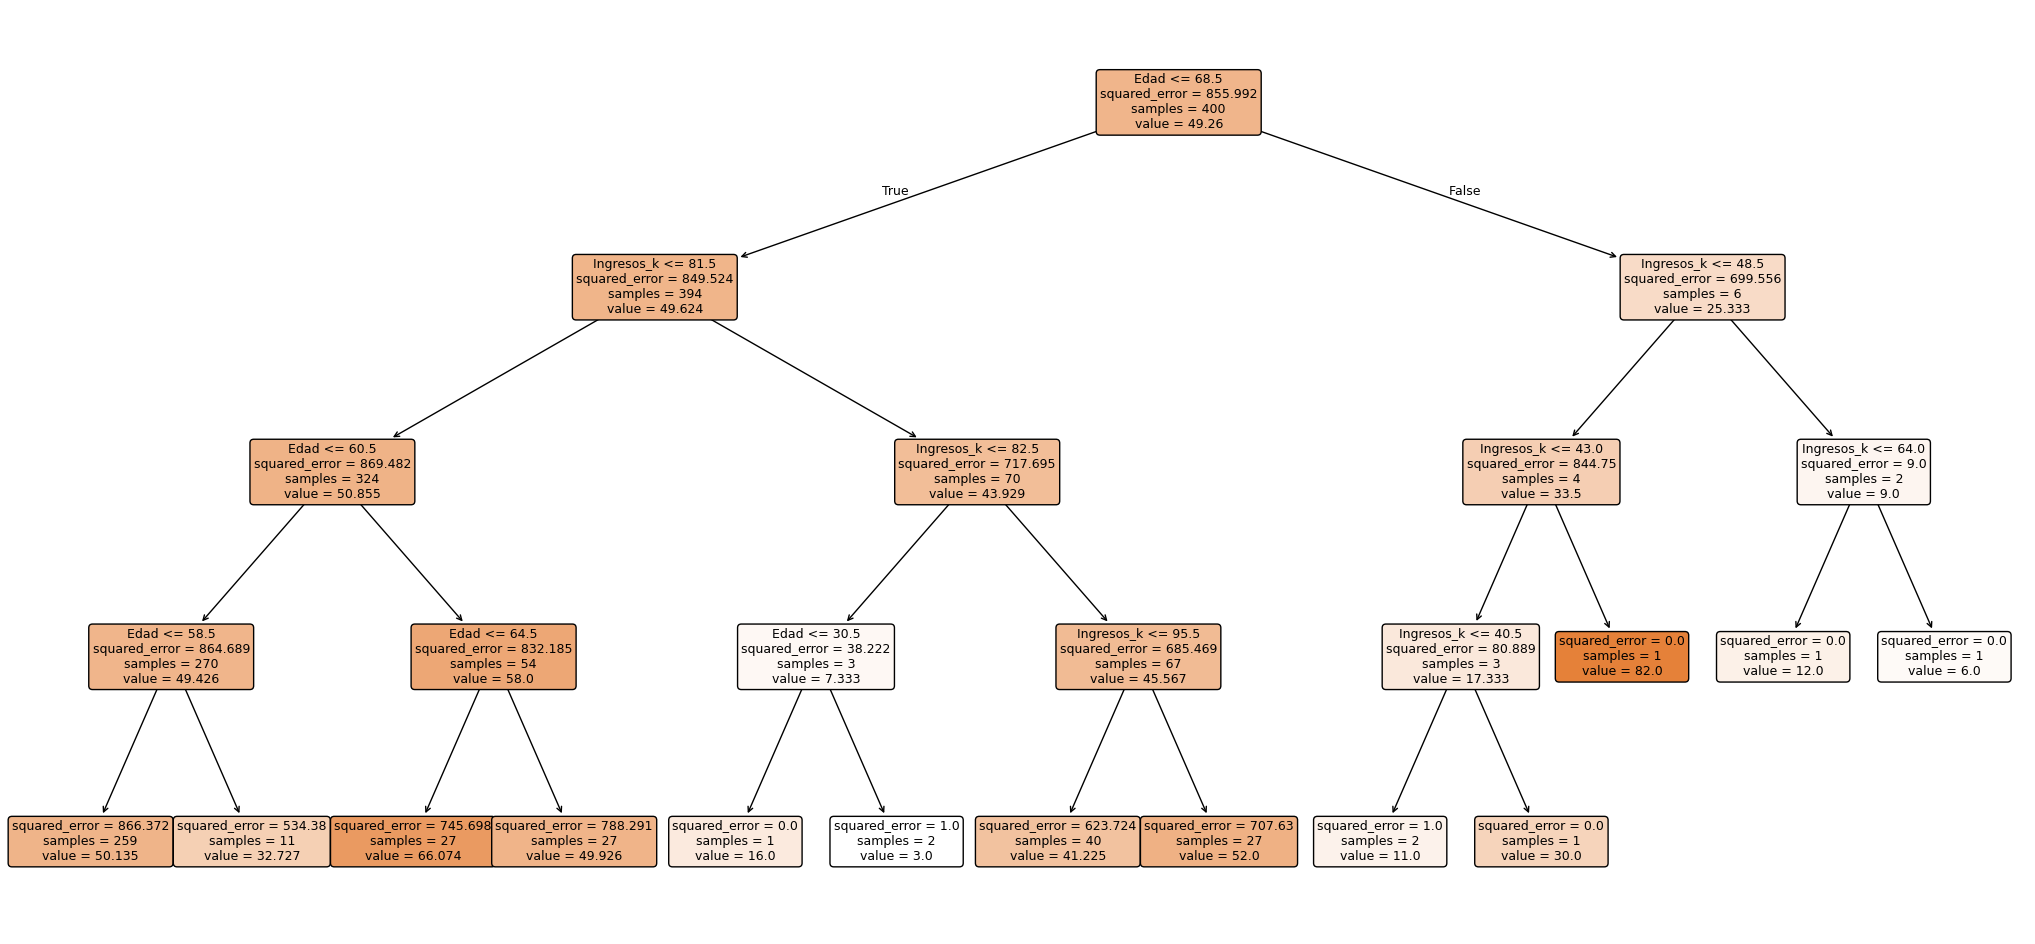

In [132]:
# 3. Visualizamos
plt.figure(figsize=(26,12))
plot_tree(reg_tree,
          feature_names=['Ingresos_k', 'Edad'],
          filled=True,
          rounded=True,
          fontsize=9)
plt.show()

# **Nombre** : Joaquin De la Hoz
# **Asignatura** : Machine Learning
# **Grado** : Doble Grado en ADE con Ingeniería Informática
# **Universidad** : CUNEF
# **Año** : 2026